In [1]:
import os
import numpy as np
import tensorflow as tf
from skimage.io import imread
from skimage.transform import resize

from datasets import asirra as dataset
from models.nn import AlexNet as ConvNet
from learning.evaluators import AccuracyEvaluator as Evaluator
import matplotlib.pyplot as plt

In [2]:
""" 2. Set test hyperparameters """
hp_d = dict()
image_mean = np.load('/tmp/asirra_mean.npy')    # load mean image
hp_d['image_mean'] = image_mean

# FIXME: Test hyperparameters
hp_d['batch_size'] = 256
hp_d['augment_pred'] = True


""" 3. Build graph, load weights, initialize a session and start test """
# Initialize
graph = tf.get_default_graph()
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

model = ConvNet([227, 227, 3], 2, **hp_d)
evaluator = Evaluator()
saver = tf.train.Saver()

sess = tf.Session(graph=graph, config=config)
saver.restore(sess, '/tmp/model.ckpt')    # restore learned weights

conv1.shape [None, 55, 55, 96]
pool1.shape [None, 27, 27, 96]
conv2.shape [None, 27, 27, 256]
pool2.shape [None, 13, 13, 256]
conv3.shape [None, 13, 13, 384]
conv4.shape [None, 13, 13, 384]
conv5.shape [None, 13, 13, 256]
pool5.shape [None, 6, 6, 256]
drop6.shape [None, 4096]
drop7.shape [None, 4096]
INFO:tensorflow:Restoring parameters from /tmp/model.ckpt


In [3]:
img_url = [
    'http://assets.shockpedia.com/app/uploads/2017/10/29091359/puppy-1.jpg',
    'https://vetstreet.brightspotcdn.com/dims4/default/5b3ffe7/2147483647/thumbnail/180x180/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2F8e%2F4e3910c36111e0bfca0050568d6ceb%2Ffile%2Fhub-dogs-puppy.jpg',
    'https://www.petfinder.com/images/breeds/dog/1460.jpg',
    'https://d4n5pyzr6ibrc.cloudfront.net/media/27FB7F0C-9885-42A6-9E0C19C35242B5AC/4785B1C2-8734-405D-96DC23A6A32F256B/thul-90efb785-97af-5e51-94cf-503fc81b6940.jpg?response-content-disposition=inline',
    'http://www.bristol.ac.uk/media-library/sites/vetscience/migrated/images/catstudymonte.jpg',
    'https://ichef.bbci.co.uk/images/ic/480xn/p04gr933.jpg'
]
    
imgs = []
for url in img_url:
    print(url)
    img = imread(url)    # Read image from URL
    # Resize and reshape image
    imgs.append(resize(img, (256, 256), mode='constant'))
X_test = np.stack(imgs)
test_set = dataset.DataSet(X_test, labels=None)

http://assets.shockpedia.com/app/uploads/2017/10/29091359/puppy-1.jpg
https://vetstreet.brightspotcdn.com/dims4/default/5b3ffe7/2147483647/thumbnail/180x180/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2F8e%2F4e3910c36111e0bfca0050568d6ceb%2Ffile%2Fhub-dogs-puppy.jpg
https://www.petfinder.com/images/breeds/dog/1460.jpg
https://d4n5pyzr6ibrc.cloudfront.net/media/27FB7F0C-9885-42A6-9E0C19C35242B5AC/4785B1C2-8734-405D-96DC23A6A32F256B/thul-90efb785-97af-5e51-94cf-503fc81b6940.jpg?response-content-disposition=inline
http://www.bristol.ac.uk/media-library/sites/vetscience/migrated/images/catstudymonte.jpg
https://ichef.bbci.co.uk/images/ic/480xn/p04gr933.jpg


In [4]:
test_y_pred = model.predict(sess, test_set, **hp_d)

In [5]:
print(test_y_pred)

[[  1.13267955e-08   1.00000000e+00]
 [  6.38368353e-02   9.36163127e-01]
 [  3.33131291e-04   9.99666989e-01]
 [  1.00000000e+00   3.91114385e-09]
 [  9.99940753e-01   5.91740936e-05]
 [  8.37143779e-01   1.62856251e-01]]


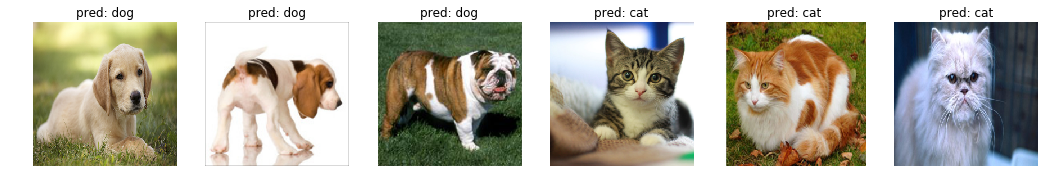

In [6]:
fig, axes = plt.subplots(1, 6, figsize=(18, 6))
for i, (img, y_pred) in enumerate(zip(test_set.images, test_y_pred)):
    axes[i].imshow(img)
    _ = axes[i].axis('off')
    axes[i].set_title('pred: {}'.format('cat' if y_pred.argmax() == 0 else 'dog'))
plt.show()